In [3]:
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [8]:
FILE_PATH = os.path.join("dataset", "pre_processed_data.csv")
df = pd.read_csv(FILE_PATH)

df1 = df.head(5000)
df

,trip_id,start_stop_id,arrival_time,arrival_hour,arrival_minute,stop_sequence_x,stop_lat,stop_lon,route_id,direction_id,speed_kmh,segment_max_speed_kmh,runtime_sec,end_stop_id,distance_m,next_lat,next_lon,congestion_level
0,239-501-008-1077.2.21:231800-40-163_C4D1C647-B...,2071,1899-12-31 19:03:30.000000000,19,3,27,50.813915,7.150895,800501,1,8.0,32.0,240.0,2664,564.754925,50.813915,7.150895,4
1,214018-214-003-5228.2.30:240000-13-63_1E4738C6...,5228,1900-01-01 00:00:00.000000000,0,0,1,51.031508,6.991655,300214,1,35.0,35.0,60.0,3030,580.498645,51.032293,6.996590,1
2,37-801-013-6058.2.22:233600-22-1_06E3FE31-6272...,6140,1900-01-01 00:00:00.000000000,0,0,15,50.597670,6.786604,1300801,0,28.0,28.0,120.0,6139,944.296236,50.597332,6.773887,2
3,1033-800-012-687.2.29:232000-26-1_0288161C-A12...,6038,1900-01-01 00:00:00.000000000,0,0,24,50.626154,6.953136,1200800,1,30.0,30.0,120.0,7113,993.415545,50.629212,6.947502,2
4,1033-800-012-687.2.29:232000-26-1_0288161C-A12...,6038,1900-01-01 00:00:00.000000000,0,0,24,50.626154,6.953136,1200800,0,14.0,14.0,120.0,2823,460.017347,50.627001,6.948476,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15837,724088-24-003-8658.2.24:213900-26-188_6476DBC3...,3439,1900-01-01 22:02:59.849624060,22,2,20,51.074882,7.027827,300024,1,35.0,35.0,60.0,3438,581.458670,51.072339,7.020593,1
15838,724088-24-003-8658.2.24:213900-26-188_6476DBC3...,3440,1900-01-01 22:03:16.818181816,22,3,19,51.077904,7.034715,300024,0,40.0,40.0,60.0,3523,662.374525,51.074882,7.027827,1
15839,724088-24-003-8658.2.24:213900-26-188_6476DBC3...,3438,1900-01-01 22:03:59.849624060,22,3,21,51.072339,7.020593,300024,1,28.8,48.0,108.0,7670,791.679818,51.072339,7.020593,1
15840,724088-24-003-8658.2.24:213900-26-188_6476DBC3...,3439,1900-01-01 22:04:16.818181816,22,4,20,51.074882,7.027827,300024,0,35.0,36.0,60.0,3440,590.358060,51.072339,7.020593,1


In [9]:
df.columns

Index(['trip_id', 'start_stop_id', 'arrival_time', 'arrival_hour',
       'arrival_minute', 'stop_sequence_x', 'stop_lat', 'stop_lon', 'route_id',
       'direction_id', 'speed_kmh', 'segment_max_speed_kmh', 'runtime_sec',
       'end_stop_id', 'distance_m', 'next_lat', 'next_lon',
       'congestion_level'],
      dtype='object')

In [10]:
df.isnull().sum()

trip_id                  0
start_stop_id            0
arrival_time             0
arrival_hour             0
arrival_minute           0
stop_sequence_x          0
stop_lat                 0
stop_lon                 0
route_id                 0
direction_id             0
speed_kmh                0
segment_max_speed_kmh    0
runtime_sec              0
end_stop_id              0
distance_m               0
next_lat                 0
next_lon                 0
congestion_level         0
dtype: int64

In [12]:
y = df['congestion_level']
X = df[['arrival_hour', 'arrival_minute', 'stop_lat', 'stop_lon', 'next_lat', 'next_lon', 'direction_id']]

In [13]:
X.columns

Index(['arrival_hour', 'arrival_minute', 'stop_lat', 'stop_lon', 'next_lat',
       'next_lon', 'direction_id'],
      dtype='object')

In [14]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [15]:
print(f'X : {X.shape}')

X : (15842, 7)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [17]:
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {X_test.shape}')

X_train : (12673, 7)
X_test : (3169, 7)
y_train : (12673,)
y_test : (3169, 7)


In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum of level in tree
max_depth = [2, 4]
# Minimum number of samples required to split a node
min_samples_split = [20, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10, 20]
# Method of selecting samples for each training tree
bootstrap = [True, False]

In [19]:
# Create param grid
random_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}
print(random_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['sqrt'], 'max_depth': [2, 4], 'min_samples_split': [20, 50], 'min_samples_leaf': [10, 20], 'bootstrap': [True, False]}


In [20]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees
    'max_depth': [None, 10, 20],  # Adjust the maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Adjust min samples to split
    'min_samples_leaf': [1, 2, 4],  # Adjust min samples in leaf nodes
    'max_features': ['sqrt'],  # Consider feature subsets
    'bootstrap': [True, False]  # Bootstrapping
}

In [21]:
model = RandomForestClassifier()

In [22]:
rf_grid = GridSearchCV(estimator = model, param_grid = random_grid, cv = 3, verbose = 2, n_jobs = 4)

In [23]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['sqrt'], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [20, 50],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [24]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 25}

In [25]:
# Make predictions on the training set
y_train_pred = rf_grid.predict(X_train)

# Make predictions on the validation/test set
y_test_pred = rf_grid.predict(X_test)

# Calculate the accuracy on the training and validation/test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy - : {train_accuracy:f}')
print(f'Test Accuracy - : {val_accuracy:f}')

Train Accuracy - : 0.356743
Test Accuracy - : 0.348690


In [26]:
rf_preds = rf_grid.predict(X_test)
print("MAE (Random Forest): " + str(mean_absolute_error(y_test, rf_preds)))
acc_score = accuracy_score(y_test, rf_preds)
print("Accuracy Score: " + str(acc_score))

MAE (Random Forest): 0.9548753550015778
Accuracy Score: 0.34869043862417165


In [149]:
model_filename = 'model_file.p'
model_path = os.path.join('Random_forest_saved_model', model_filename)

# Save the model to the specified path
with open(model_path, 'wb') as model_file:
    pickle.dump(rf_grid, model_file)

In [30]:
y1 = df['congestion_level']
X1 = df[['arrival_hour', 'arrival_minute', 'stop_lat', 'stop_lon', 'next_lat', 'next_lon', 'direction_id']]

In [31]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
def test_model(model, X, y):
    kf = KFold(n_splits=4)
    mae_train = []
    mae_test = []
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        mae_test.append(mean_absolute_error(y_test, y_test_pred))

    folds = range(1, kf.get_n_splits() + 1)
    plt.plot(folds, mae_train, 'o-', color='green', label='train')
    plt.plot(folds, mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

Fitting 3 folds for each of 160 candidates, totalling 480 fits
Fitting 3 folds for each of 160 candidates, totalling 480 fits
Fitting 3 folds for each of 160 candidates, totalling 480 fits
Fitting 3 folds for each of 160 candidates, totalling 480 fits


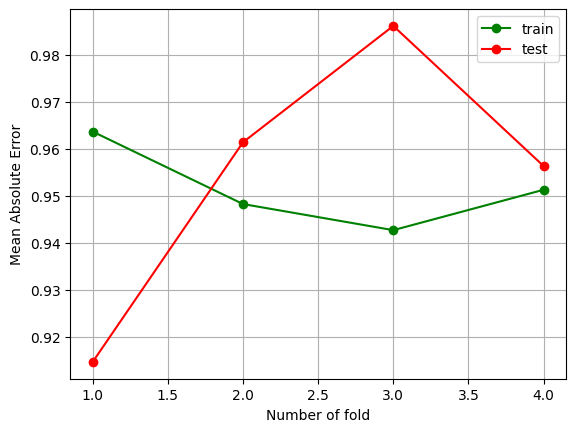

In [32]:
test_model(rf_grid, X1,y1)

In [33]:
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error
def generate_model_report(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Generate classification report for classification models
    if hasattr(model, 'predict_proba'):
        y_train_pred_proba = model.predict_proba(X_train)
        y_test_pred_proba = model.predict_proba(X_test)
    else:
        y_train_pred_proba = None
        y_test_pred_proba = None

    # Classification report for classification models
    if y_train_pred_proba is not None:
        class_names = list(map(str, model.classes_))
        train_classification_report = classification_report(y_train, y_train_pred, target_names=class_names)
        test_classification_report = classification_report(y_test, y_test_pred, target_names=class_names)
    else:
        train_classification_report = None
        test_classification_report = None

    # Display the model performance metrics
    print("Train Accuracy: {:.4f}".format(train_accuracy))
    print("Test Accuracy: {:.4f}".format(test_accuracy))
    print("Train MAE: {:.4f}".format(train_mae))
    print("Test MAE: {:.4f}".format(test_mae))
    
    # Display classification report for classification models
    if train_classification_report:
        print("Classification Report (Training Data):\n", train_classification_report)
        print("Classification Report (Testing Data):\n", test_classification_report)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
Train Accuracy: 0.9619
Test Accuracy: 0.9607
Train MAE: 0.0383
Test MAE: 0.0398
Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      4460
           1       0.98      0.91      0.94      5744
           2       0.97      0.96      0.96     13473
           3       0.92      0.98      0.95      8269
           4       0.98      0.98      0.98      8261

    accuracy                           0.96     40207
   macro avg       0.97      0.96      0.96     40207
weighted avg       0.96      0.96      0.96     40207

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1135
           1       0.97      0.91      0.94      1414
           2       0.97      0.96      0.96      3402
           3       0.92      0.98      0.95      2064
           4      

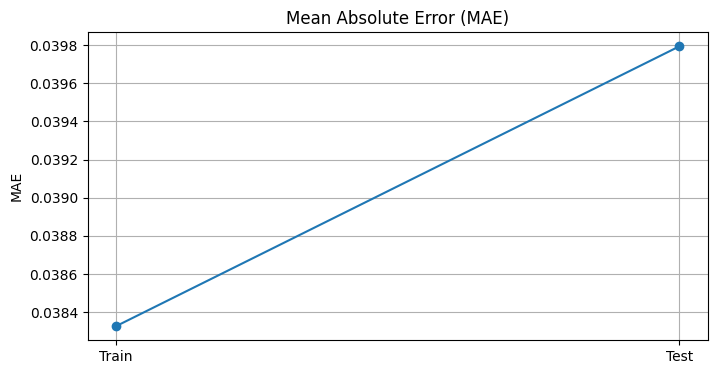

In [127]:
generate_model_report(rf_grid, X_train, y_train, X_test, y_test)